In [1]:
import random
import pandas as pd

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
import random

# Generate random data
d1 = [random.random() for _ in range(50000)]
d2 = [random.random() for _ in range(50000)]
d3 = [random.random() for _ in range(50000)]
d4 = [2 * x + 3 * y + z for x, y, z in zip(d1, d2, d3)]

# Create DataFrame
df = pd.DataFrame({'x1': d1, 'x2': d2, 'x3': d3, 'x4': d4})

# Define bin edges and labels
bins = [df["x4"].min(), df["x4"].quantile(0.50),df["x4"].max()]
labels = ["Low", "High"]

# Create x5 column with bins
df["x5"] = pd.cut(df["x4"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
print(df.head())

         x1        x2        x3        x4    x5
0  0.499125  0.207219  0.389789  2.009696   Low
1  0.858867  0.903358  0.600576  5.028382  High
2  0.385977  0.408110  0.786194  2.782478   Low
3  0.763290  0.512710  0.616998  3.681710  High
4  0.764612  0.181774  0.121113  2.195659   Low


In [5]:
df["x5_encoded"] = df["x5"].map({"Low": -1, "High": 1})

In [6]:
df["x5_encoded"] = df["x5_encoded"].astype(int)

In [7]:
X = df.iloc[:,0:3]
Y = df.iloc[:,5]

In [8]:
Y

0       -1
1        1
2       -1
3        1
4       -1
        ..
49995   -1
49996    1
49997   -1
49998    1
49999    1
Name: x5_encoded, Length: 50000, dtype: int32

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
df.head()

,x1,x2,x3,x4,x5,x5_encoded
0,0.499125,0.207219,0.389789,2.009696,Low,-1
1,0.858867,0.903358,0.600576,5.028382,High,1
2,0.385977,0.408110,0.786194,2.782478,Low,-1
3,0.763290,0.512710,0.616998,3.681710,High,1
4,0.764612,0.181774,0.121113,2.195659,Low,-1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
Y

0       -1
1        1
2       -1
3        1
4       -1
        ..
49995   -1
49996    1
49997   -1
49998    1
49999    1
Name: x5_encoded, Length: 50000, dtype: int32

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')  # 3 output classes: -1, 0, 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

C:\Users\JANARDHAN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
h1=model.fit(X_train, y_train, epochs=20)

Epoch 1/20


C:\Users\JANARDHAN\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5011 - loss: -0.3982
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4986 - loss: -31.5481
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4964 - loss: -172.1789
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5042 - loss: -459.9492
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5009 - loss: -932.1397
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5003 - loss: -1605.2052
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4974 - loss: -2517.1438
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4994 - loss: -3645.6289
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4991 - loss: -5071.5156
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4968 - loss: -6807.7583
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4993 - loss: -8729.4834
Epoch

In [20]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
from sklearn.metrics import r2_score,accuracy_score

In [22]:
accuracy_score(y_pred, y_test)

0.5023

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

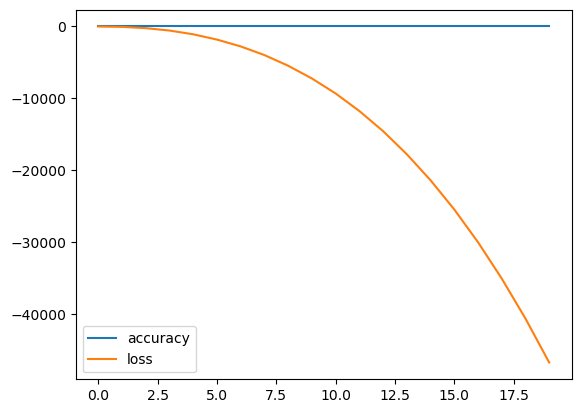

In [24]:
metrics_df = pd.DataFrame(h1.history)
metrics_df.plot()